# importing libarires

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats

step:2 create the dataset

In [3]:
#set the random seed for reproductability 
np.random.seed(42)

#create a synthetic dataset 
data = {
    'product_id' : range(1,21),
    'product_name':[f'product {i}' for i in range(1,21)],
    'units_sold': np.random.poisson(lam=20,size = 20), # poisson disturbution for sales
    'category': np.random.choice(['Electroincs', 'clothing','Home','Sports'],20),
    'sale_date': pd.date_range(start = '2023-01-01',periods = 20, freq = 'D')
}

sales_data = pd.DataFrame(data)

#Display the dirst few rows of the datset 
print("Sales Data:")
print(sales_data)

Sales Data:
    product_id product_name  units_sold     category  sale_date
0            1    product 1          23       Sports 2023-01-01
1            2    product 2          15     clothing 2023-01-02
2            3    product 3          21         Home 2023-01-03
3            4    product 4          25       Sports 2023-01-04
4            5    product 5          15  Electroincs 2023-01-05
5            6    product 6          17     clothing 2023-01-06
6            7    product 7          19       Sports 2023-01-07
7            8    product 8          21  Electroincs 2023-01-08
8            9    product 9          17       Sports 2023-01-09
9           10   product 10          19  Electroincs 2023-01-10
10          11   product 11          16     clothing 2023-01-11
11          12   product 12          21         Home 2023-01-12
12          13   product 13          21  Electroincs 2023-01-13
13          14   product 14          17       Sports 2023-01-14
14          15   product 15 

In [4]:
# save the Dataframe as a csv file
sales_data.to_csv('sales_data.csv', index = False)

In [5]:
# path location to find 
import os 
os.getcwd()

'c:\\Users\\tharu\\.vscode\\statisctics'

Step 3 : Descriptive Stats

In [6]:
# Descriptive Statistics 
descriptive_stats = sales_data['units_sold'].describe()

In [7]:
# Display the descriptive stats 
print("\nDescriptive Statistics for units sold:")
print(descriptive_stats)


Descriptive Statistics for units sold:
count    20.000000
mean     18.950000
std       2.999561
min      14.000000
25%      17.000000
50%      19.000000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64


In [17]:
# Additional Statistics 
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var() # Here we are using the Population variance formula
std_deviation_sales = sales_data['units_sold'].std()

# Group by category and calculate total and average sales 
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['Category', 'Total Units Sold','Average Units Sold', 'Std dev for units Sold']

#Display the results 
print("\nStatistical Analysis:")
print(f"Mean units sold: {mean_sales}")
print(f"Median units sold: {median_sales}")
print(f"Mode of units sold: {mode_sales}")
print(f"Variance of units sold: {variance_sales}")
print(f"Standard Deviation of  units sold: {std_deviation_sales}")
print("\nCategorical Statistics:")
print(category_stats)


Statistical Analysis:
Mean units sold: 18.95
Median units sold: 19.0
Mode of units sold: 21
Variance of units sold: 8.997368421052633
Standard Deviation of  units sold: 2.9995613714429368

Categorical Statistics:
      Category  Total Units Sold  Average Units Sold  Std dev for units Sold
0  Electroincs               111                18.5                3.209361
1         Home                42                21.0                0.000000
2       Sports               156                19.5                3.162278
3     clothing                70                17.5                3.109126


Step 4: Inferential Statistics

In [9]:
#confidence Interval for the mean of units sold
confidence_level = 0.95 
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence interval 
t_score = stats.t.ppf((1 + confidence_level)/ 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the mean of units sold:")
print(confidence_interval)


Confidence Interval for the mean of units sold:
(17.546162065224046, 20.353837934775953)


In [10]:
#confidence Interval for the mean of units sold
confidence_level = 0.99 
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence interval 
t_score = stats.t.ppf((1 + confidence_level)/ 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the mean of units sold:")
print(confidence_interval)


Confidence Interval for the mean of units sold:
(17.031107323640775, 20.868892676359224)


Hypothesis Testing

In [11]:
#Hypothesis Testing(t-test)
# Null hypothesis: Mean units sold is equal to 20 
#Alternative hypothesis: mean units sold is not equal to 20 

t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\nHypothesis testing (t-test):")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The Mean units Sold is signoificantly different from 20.")
else:
    print("Fail to reject the null hypothesis : The mean units sold is not significantly diffferent from 20.")


Hypothesis testing (t-test):
T-statistic: -1.565476471811836, P-value: 0.1339747090420546
Fail to reject the null hypothesis : The mean units sold is not significantly diffferent from 20.


Step 5 : Visualization

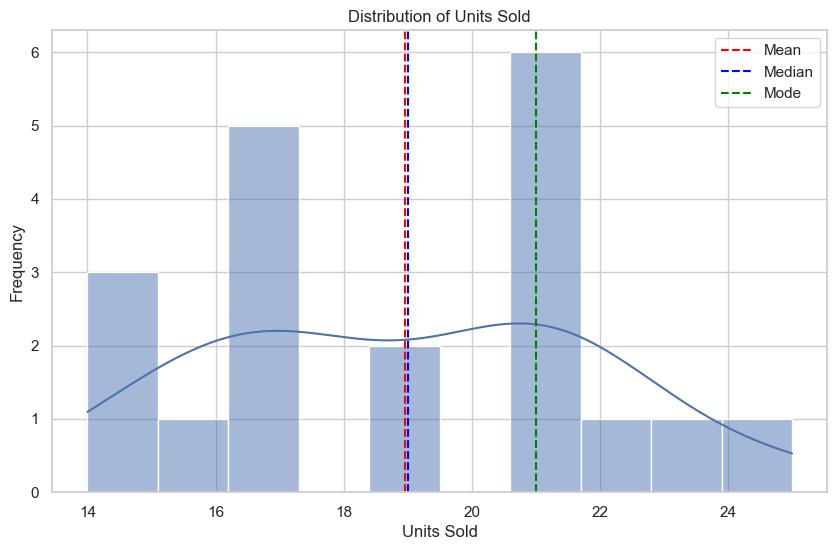

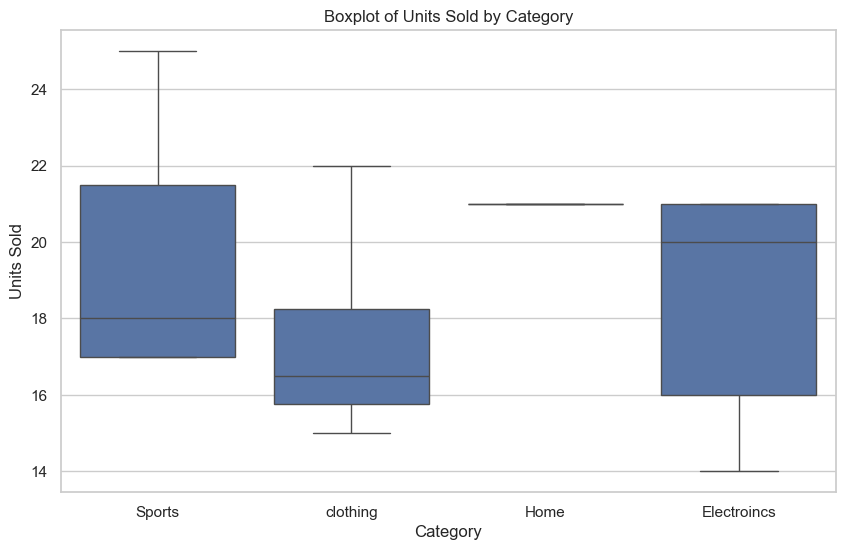

In [12]:
sns.set(style="whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()



In [15]:
print(category_stats.columns)

Index(['category', 'sum', 'mean', 'std'], dtype='object')


In [18]:
'Total Units Sold' in category_stats.columns


True

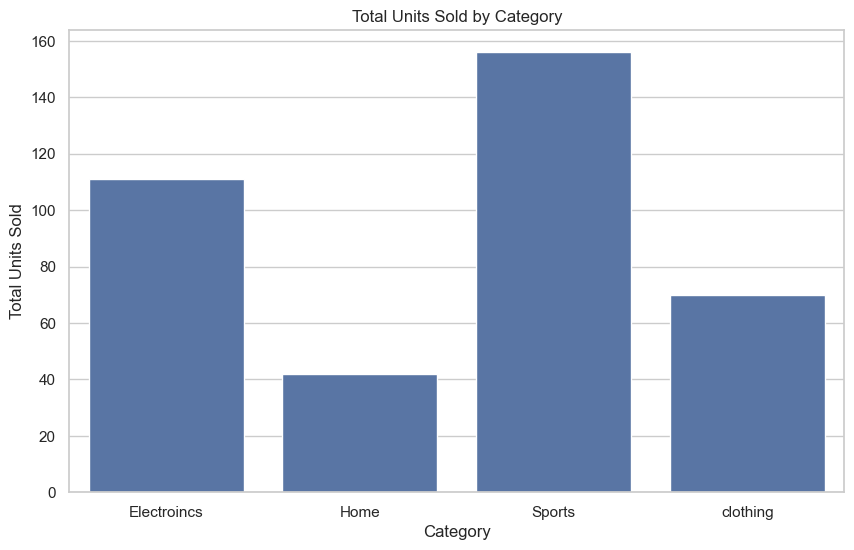

In [21]:
# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Units Sold', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()